In [60]:
# Importing libraries used for data analysis and visualzation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
# Importing the IPL dataset
ds=pd.read_csv("iplmatches.csv")

In [62]:
# Information about the loaded dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [63]:
# Colomns of dataset
ds.columns

# Add year column by extracting year from date column
ds['year'] = pd.DatetimeIndex(ds['date']).year

In [64]:
ds.drop('method', inplace=True, axis=1)
ds.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008


In [65]:
ds.isnull()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
812,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
813,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
814,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [66]:
ds.drop("result_margin",axis=1,inplace=True)

In [67]:
ds["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [68]:
ds["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [69]:
print("NUMBER OF MATCHES PLAYED IN EACH VENUE")
ds["venue"].value_counts()

NUMBER OF MATCHES PLAYED IN EACH VENUE


Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

In [70]:
print("Team1")
print(ds["team1"].unique())
print("Team2")
print(ds["team2"].unique())

Team1
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']
Team2
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals']


In [71]:
print("ALL POSSIBLE RESULTS OF MATCHES")
print(ds["result"].unique())
print("\nRESULT COUNTS")
print(ds["result"].value_counts())

ALL POSSIBLE RESULTS OF MATCHES
['runs' 'wickets' 'tie' nan]

RESULT COUNTS
wickets    435
runs       364
tie         13
Name: result, dtype: int64


In [72]:
ds["toss_decision"].value_counts()

field    496
bat      320
Name: toss_decision, dtype: int64

In [73]:
# COUNTS FOR PLAYER OF THE MATCH
ds["player_of_match"].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: year, dtype: int64


Text(0, 0.5, 'NO. OF MATCHES')

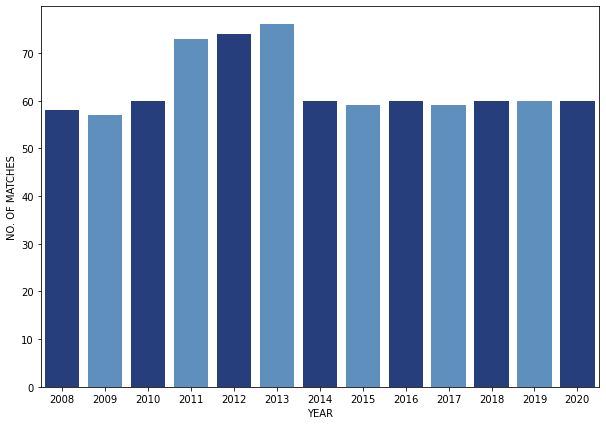

In [143]:
# Which season has the maximum no. of matches?
print(ds["year"].value_counts().sort_index(ascending=True))
plt.figure(figsize=(10,7))
sns.countplot(x=ds["year"],palette=['#19388A',"#4F91CD"])
plt.xlabel("YEAR")
plt.ylabel("NO. OF MATCHES")

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


Text(0.5, 0, 'NO. OF WINS')

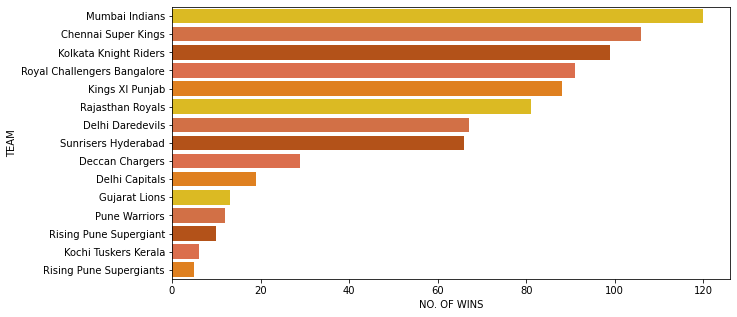

In [142]:
print(ds["winner"].value_counts())
plt.figure(figsize=(10,5))
data=ds["winner"].value_counts()
sns.barplot(x=data,y=data.index,palette=['#F9CD05',"#E9672F","#CC4B00","#F36235","#FF8000"])
plt.ylabel("TEAM")
plt.xlabel("NO. OF WINS")

Text(0.5, 0, 'MAN OF THE MATCH')

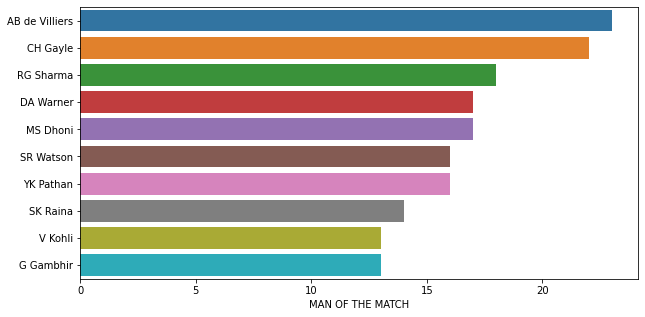

In [150]:
# top players of the match
plt.figure(figsize=(10,5))
data=ds["player_of_match"].value_counts()[:10]
sns.barplot(x=data,y=data.index)
plt.xlabel("MAN OF THE MATCH")

In [151]:
dt=ds.loc[ds["toss_winner"]==ds["winner"]]["winner"]

c:\users\samyak jain\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

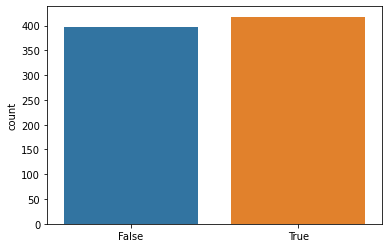

In [156]:
sns.countplot(ds["toss_winner"]==ds["winner"])

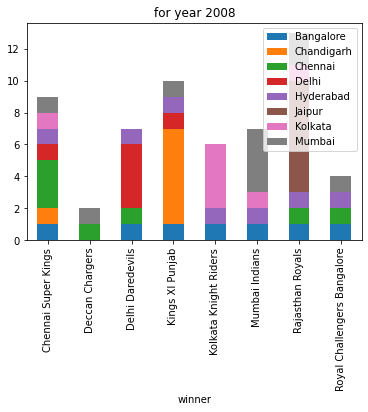

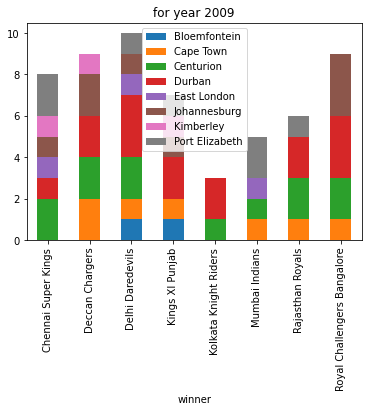

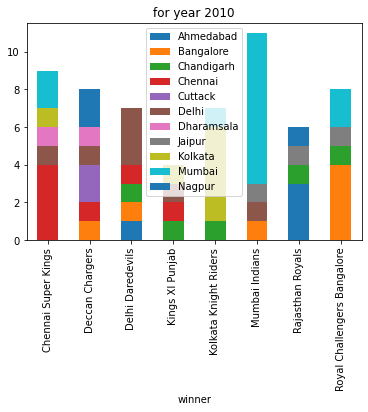

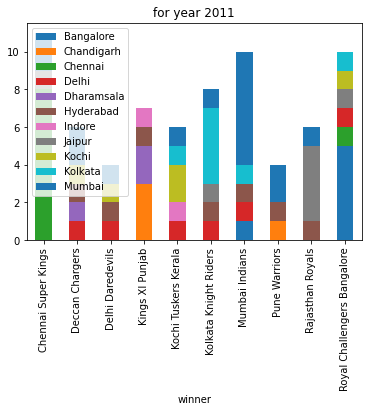

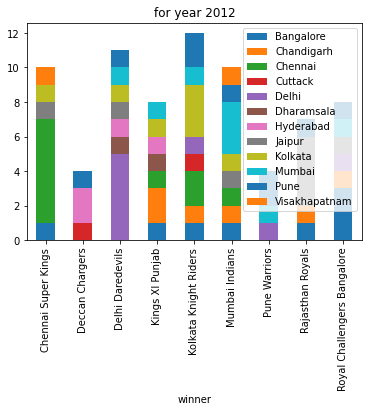

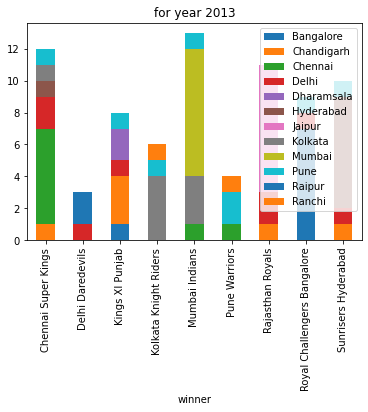

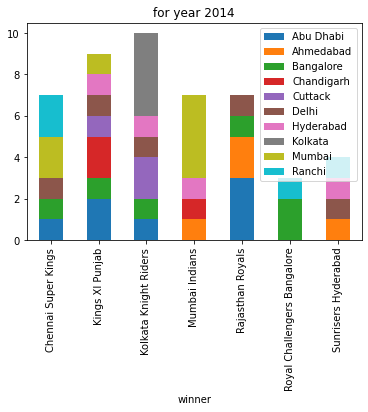

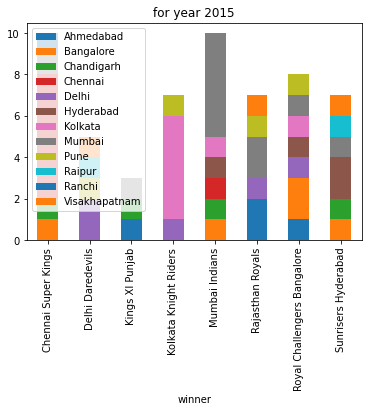

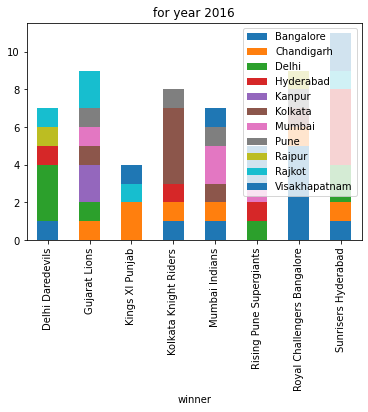

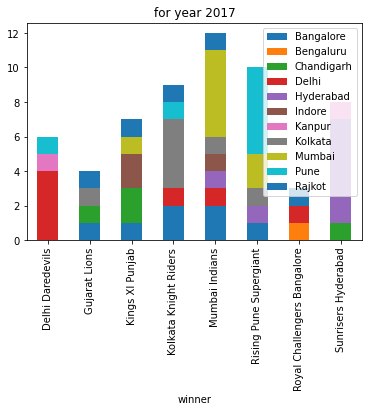

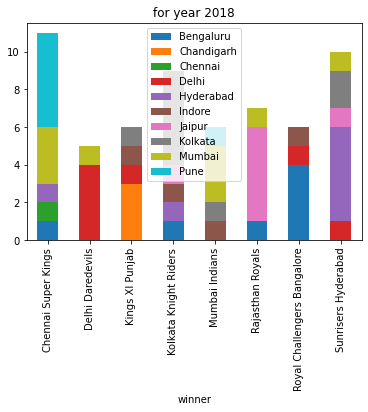

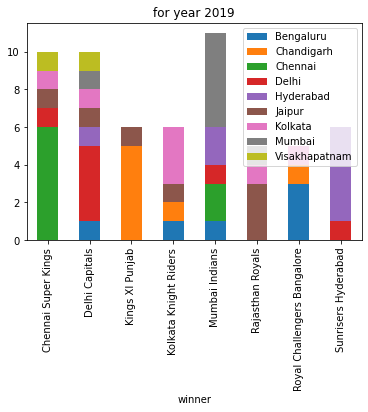

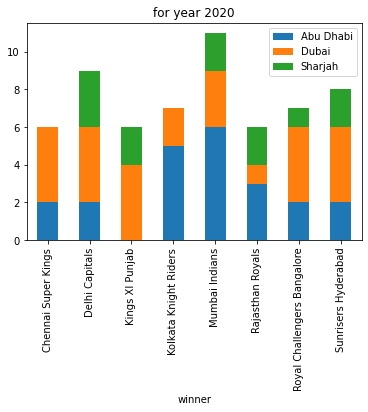

In [159]:
for year in ds["year"].unique():
       data= ds[ds["year"]==year].groupby(["winner","city"])["id"].count().unstack()
       data.plot(kind="bar",stacked=True,title="for year "+str(year))
       plt.legend(loc="best")

Text(0.5, 0, 'CITY')

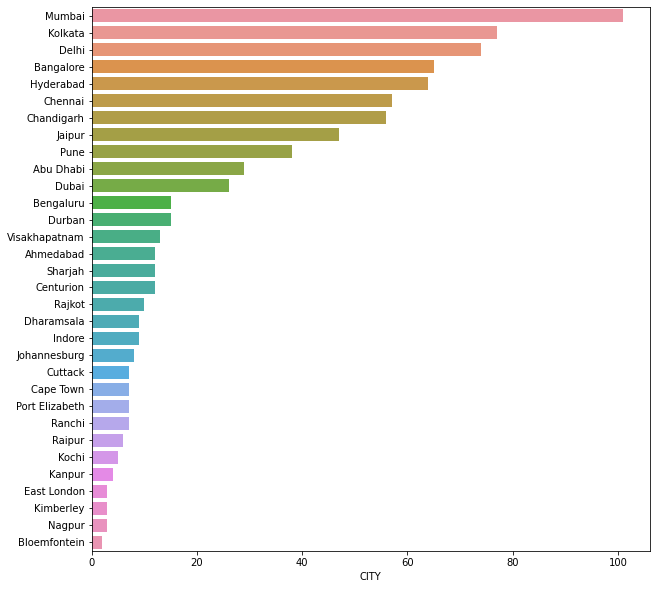

In [161]:
# matches played in different cities
data=ds["city"].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=data,y=data.index)
plt.xlabel("CITY")

<AxesSubplot:xlabel='venue'>

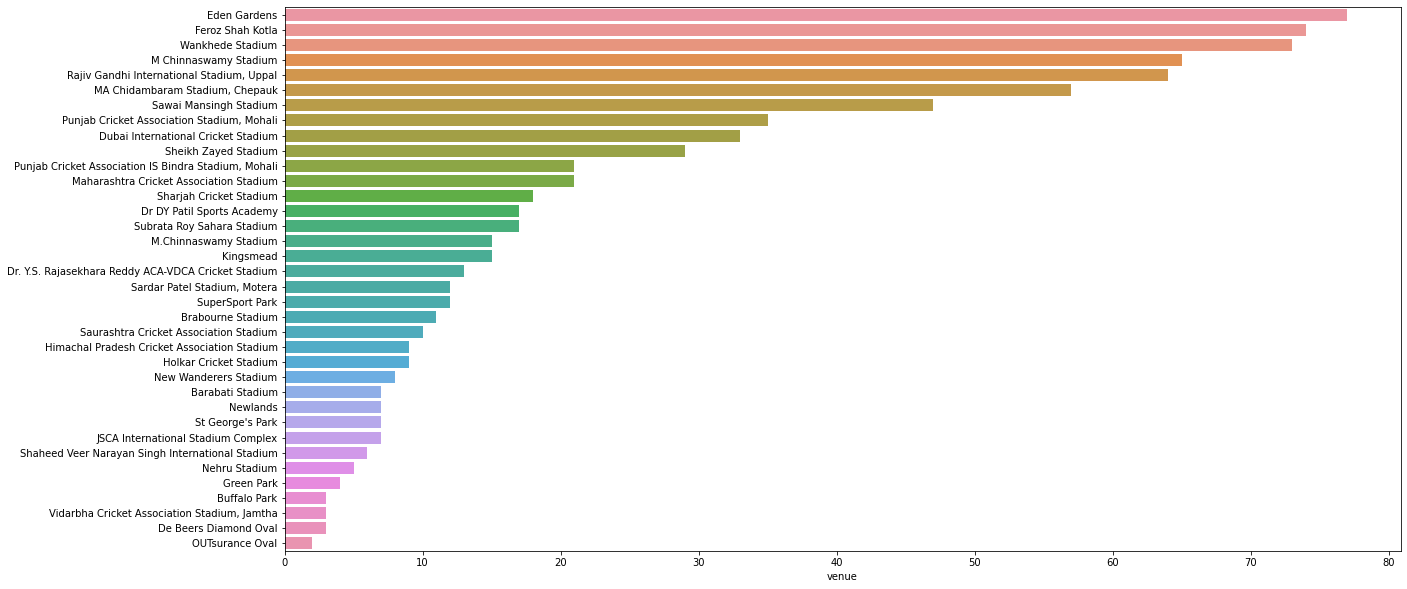

In [166]:
# matches played in stadium
data=ds["venue"].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=data,y=data.index)

In [169]:
#maximum toss winning team
data=ds["toss_winner"].value_counts()
print("Maximum no. of times toss winning team: ",data.index[0])
print("Number of times",data.index[0]," won the toss: ",data[0])

Maximum no. of times toss winning team:  Mumbai Indians
Number of times Mumbai Indians  won the toss:  106


<AxesSubplot:xlabel='city'>

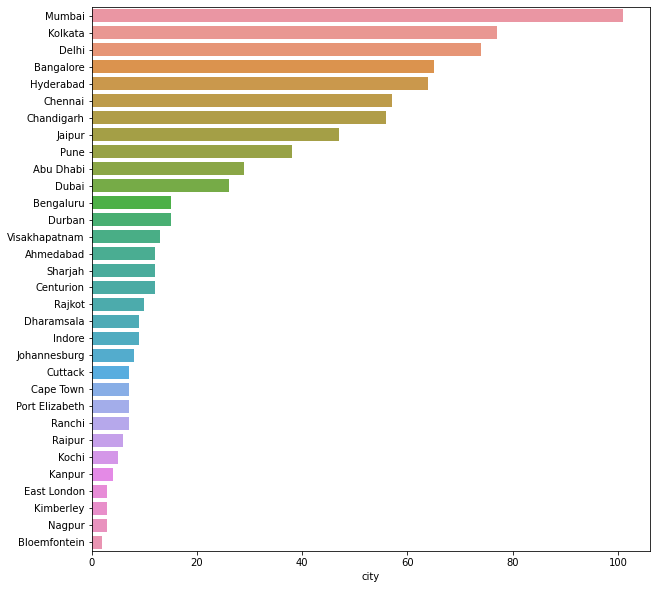

In [170]:
data=ds["city"].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=data,y=data.index)

<AxesSubplot:xlabel='umpire2'>

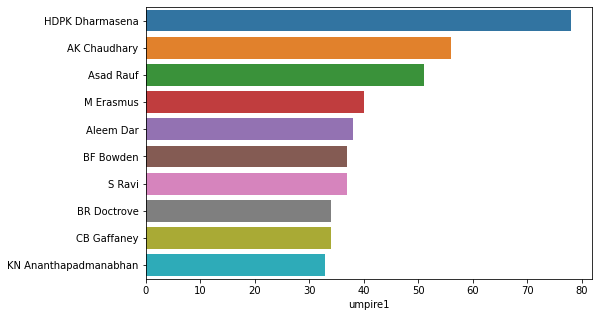

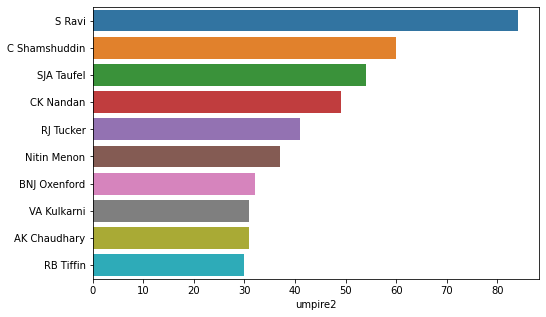

In [174]:
#top 10 umpire 1 and umpire 2
data1=ds["umpire1"].value_counts()[:10]
plt.figure(figsize=(8,5))
sns.barplot(x=data1,y=data1.index)
data2=ds["umpire2"].value_counts()[:10]
plt.figure(figsize=(8,5))
sns.barplot(x=data2,y=data2.index)